# **Data Analysis:**

In [ ]:
# !pip install boto3

In [39]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings('ignore')

# importing libraries
import numpy as np
import pandas as pd
import boto3
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

%matplotlib inline
sns.set()

## **Load Data:**

In [40]:
s3_client = boto3.resource(
    service_name = "s3",
    region_name = "us-east-1",
    aws_access_key_id = "None",
    aws_secret_access_key = "None"
)

object = s3_client.Bucket("dib-data").Object("insurance.csv").get()  # load the object_1
data = pd.read_csv(object['Body'])   # load the dataset_1

In [41]:

data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [42]:
# Convert the column header in lower case:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '')

# Convert string values in lowe case:
data = data.applymap(lambda s: s.lower() if type(s) == str else s)
data = data.applymap(lambda s: s.strip() if type(s) == str else s)
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [43]:
data.shape

(1338, 7)

In [44]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [45]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [46]:
# get unique categories for neumerical featurees:

for col in data.dtypes[data.dtypes == 'int64'].index:
    print(f"{col}: have {len(data[col].unique())} unique categories:  {sorted(data[col].unique())}\n")

# for col in data.dtypes[data.dtypes == 'float64'].index:
#     print(f"{col}: have {len(data[col].unique())} unique categories:  {sorted(data[col].unique())}")

age: have 47 unique categories:  [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]

children: have 6 unique categories:  [0, 1, 2, 3, 4, 5]



In [47]:
# get unique categories for categorical featurees:

for col in data.dtypes[data.dtypes == 'object'].index:
    print(f"{col}: have {len(data[col].unique())} unique categories:  {data[col].unique()}")

sex: have 2 unique categories:  ['female' 'male']
smoker: have 2 unique categories:  ['yes' 'no']
region: have 4 unique categories:  ['southwest' 'southeast' 'northwest' 'northeast']


In [48]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


## **Check Data Distribution:**


#### **age feature:**

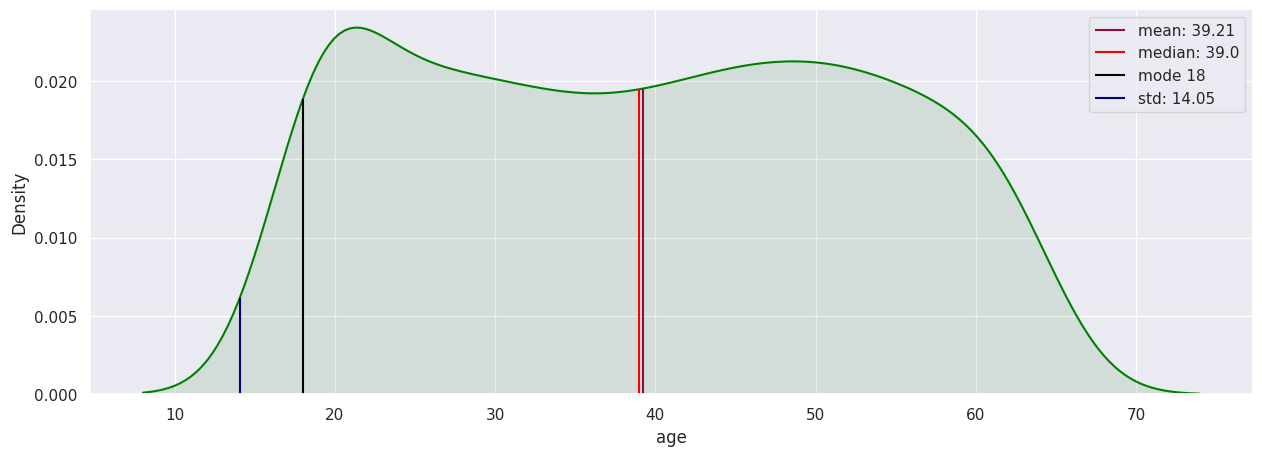

In [49]:
# age feature:

plt.figure(figsize=(15,5))
ax = sns.kdeplot(data=data, x="age", shade=False, color='green')


kdeline = ax.lines[0]
mean = data['age'].mean()
median = data['age'].median()
mode = data['age'].mode()[0]
std = data['age'].std()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

# mean:
height_mean = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height_mean, color='#900C3F', ls='-', label=f"mean: {round(mean,2)}")

# median:
height_median = np.interp(median, xs, ys)
ax.vlines(median, 0, height_median, color='red', ls='-', label=f"median: {round(median,2)}")

# mode:
height_mode = np.interp(mode, xs, ys)
ax.vlines(mode, 0, height_mode, color='black', ls='-', label=f"mode {round(mode,2)}")

# standard deviation:
height_std = np.interp(std, xs, ys)
ax.vlines(std, 0, height_std, color='darkblue', ls='-', label=f"std: {round(std,2)}")

ax.legend()
ax.fill_between(xs, 0, ys, facecolor='darkgreen', alpha=0.1)
plt.show()

In [50]:
# how many percentage of datapoints are belong in certain age groups:

age_per_below_20 = round((data[data['age'] < 20].shape[0] / data.shape[0]) * 100, 2)
age_per_between_20_to_30 = round((data[(data['age']>=20) & (data['age']<30)].shape[0] / data.shape[0]) * 100, 2)
age_per_between_30_to_40 = round((data[(data['age']>=30) & (data['age']<40)].shape[0] / data.shape[0]) * 100, 2)
age_per_between_40_to_50 = round((data[(data['age']>=40) & (data['age']<50)].shape[0] / data.shape[0]) * 100, 2)
age_per_between_50_to_60 = round((data[(data['age']>=50) & (data['age']<60)].shape[0] / data.shape[0]) * 100, 2)
age_per_above_60 = round((data[data['age'] >= 60].shape[0] / data.shape[0]) * 100, 2)

print(f"Maximum Age: {max(data['age'])}")
print(f"Minimum Age: {min(data['age'])}")
print(f"Percentage of data points where age is below 20 years age: {age_per_below_20}%")
print(f"Percentage of data points where age in between 20 & 30 years age: {age_per_between_20_to_30}%")
print(f"Percentage of data points where age in between 30 & 40 years age: {age_per_between_30_to_40}%")
print(f"Percentage of data points where age in between 40 & 50 years age: {age_per_between_40_to_50}%")
print(f"Percentage of data points where age in between 50 & 60 years age: {age_per_between_50_to_60}%")
print(f"Percentage of data points where age is above 60 years age: {age_per_above_60}%\n")

print(f"Age unique values: {data['age'].unique()}")

Maximum Age: 64
Minimum Age: 18
Percentage of data points where age is below 20 years age: 10.24%
Percentage of data points where age in between 20 & 30 years age: 20.93%
Percentage of data points where age in between 30 & 40 years age: 19.21%
Percentage of data points where age in between 40 & 50 years age: 20.85%
Percentage of data points where age in between 50 & 60 years age: 20.25%
Percentage of data points where age is above 60 years age: 8.52%

Age unique values: [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]


#### **bmi feature:**

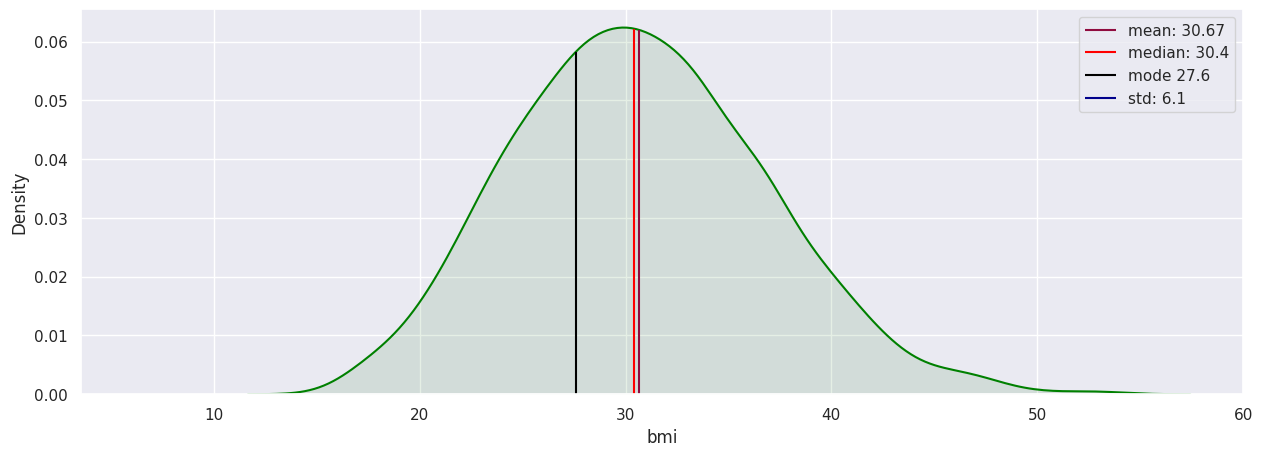

In [51]:
# bmi feature:

plt.figure(figsize=(15,5))
ax = sns.kdeplot(data=data, x="bmi", shade=False, color='green')


kdeline = ax.lines[0]
mean = data['bmi'].mean()
median = data['bmi'].median()
mode = data['bmi'].mode()[0]
std = data['bmi'].std()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

# mean:
height_mean = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height_mean, color='#900C3F', ls='-', label=f"mean: {round(mean,2)}")

# median:
height_median = np.interp(median, xs, ys)
ax.vlines(median, 0, height_median, color='red', ls='-', label=f"median: {round(median,2)}")

# mode:
height_mode = np.interp(mode, xs, ys)
ax.vlines(mode, 0, height_mode, color='black', ls='-', label=f"mode {round(mode,2)}")

# standard deviation:
height_std = np.interp(std, xs, ys)
ax.vlines(std, 0, height_std, color='darkblue', ls='-', label=f"std: {round(std,2)}")

ax.legend()
ax.fill_between(xs, 0, ys, facecolor='darkgreen', alpha=0.1)
plt.show()

In [52]:
# How many data points are belong in certain bmi factors:

bmi_per_below_18 = round((data[data['bmi'] < 18].shape[0] / data.shape[0]) * 100, 2)
bmi_per_between_18_to_25 = round((data[(data['bmi']>=18) & (data['bmi']<25)].shape[0] / data.shape[0]) * 100, 2)
bmi_per_above_25 = round((data[data['bmi'] >= 25].shape[0] / data.shape[0]) * 100, 2)

print(f"Maximum BMI: {max(data['bmi'])}")
print(f"Minimum BMI: {min(data['bmi'])}")
print(f"Percentage of data points where bmi is below 18 bmi: {bmi_per_below_18}%")
print(f"Percentage of data points where bmi in between 18 & 25 bmi: {bmi_per_between_18_to_25}%")
print(f"Percentage of data points where bmi is above 25 bmi: {bmi_per_above_25}%")

Maximum BMI: 53.1
Minimum BMI: 16.0
Percentage of data points where bmi is below 18 bmi: 1.05%
Percentage of data points where bmi in between 18 & 25 bmi: 17.04%
Percentage of data points where bmi is above 25 bmi: 81.91%


#### **expenses feature:**

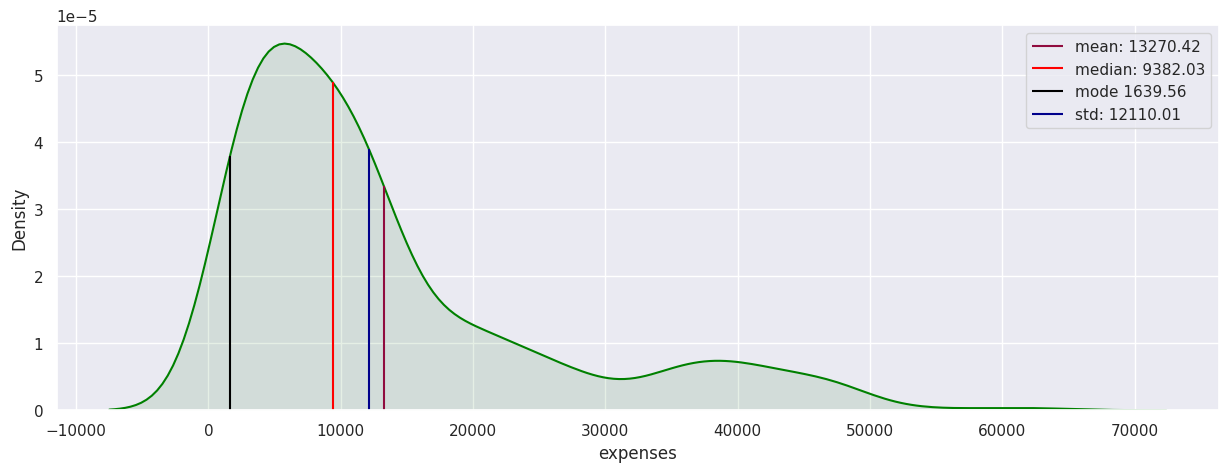

In [53]:
# expenses feature:

plt.figure(figsize=(15,5))
ax = sns.kdeplot(data=data, x="expenses", shade=False, color='green')


kdeline = ax.lines[0]
mean = data['expenses'].mean()
median = data['expenses'].median()
mode = data['expenses'].mode()[0]
std = data['expenses'].std()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

# mean:
height_mean = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height_mean, color='#900C3F', ls='-', label=f"mean: {round(mean,2)}")

# median:
height_median = np.interp(median, xs, ys)
ax.vlines(median, 0, height_median, color='red', ls='-', label=f"median: {round(median,2)}")

# mode:
height_mode = np.interp(mode, xs, ys)
ax.vlines(mode, 0, height_mode, color='black', ls='-', label=f"mode {round(mode,2)}")

# standard deviation:
height_std = np.interp(std, xs, ys)
ax.vlines(std, 0, height_std, color='darkblue', ls='-', label=f"std: {round(std,2)}")

ax.legend()
ax.fill_between(xs, 0, ys, facecolor='darkgreen', alpha=0.1)
plt.show()

In [54]:
# How many data points are belong in certain expenses values:

expences_between_1k_to_10k = round((data[(data['expenses']>=1000) & (data['expenses']<10000)].shape[0] / data.shape[0])* 100, 2)
expences_between_10k_to_20k = round((data[(data['expenses']>=10000) & (data['expenses']<20000)].shape[0] / data.shape[0])* 100, 2)
expences_between_20k_to_30k = round((data[(data['expenses']>=20000) & (data['expenses']<30000)].shape[0] / data.shape[0])* 100, 2)
expences_between_30k_to_40k = round((data[(data['expenses']>=30000) & (data['expenses']<40000)].shape[0] / data.shape[0])* 100, 2)
expences_between_40k_to_50k = round((data[(data['expenses']>=40000) & (data['expenses']<50000)].shape[0] / data.shape[0])* 100, 2)
expences_above_50k = round((data[data['expenses']>50000].shape[0] / data.shape[0])* 100, 2)

print(f"Maximum Expenses: {max(data['expenses'])}")
print(f"Minimum Expenses: {min(data['expenses'])}")
print(f"Percentage of data points where expenses in between 1k to 10k: {expences_between_1k_to_10k}%")
print(f"Percentage of data points where expenses in between 10k to 20k: {expences_between_10k_to_20k}%")
print(f"Percentage of data points where expenses in between 20k to 30k: {expences_between_20k_to_30k}%")
print(f"Percentage of data points where expenses in between 30k to 40k: {expences_between_30k_to_40k}%")
print(f"Percentage of data points where expenses in between 40k to 50k: {expences_between_40k_to_50k}%")
print(f"Percentage of data points where expenses above 50k: {expences_above_50k}%")

Maximum Expenses: 63770.43
Minimum Expenses: 1121.87
Percentage of data points where expenses in between 1k to 10k: 53.21%
Percentage of data points where expenses in between 10k to 20k: 26.38%
Percentage of data points where expenses in between 20k to 30k: 8.3%
Percentage of data points where expenses in between 30k to 40k: 6.2%
Percentage of data points where expenses in between 40k to 50k: 5.38%
Percentage of data points where expenses above 50k: 0.52%


#### **children feature:**

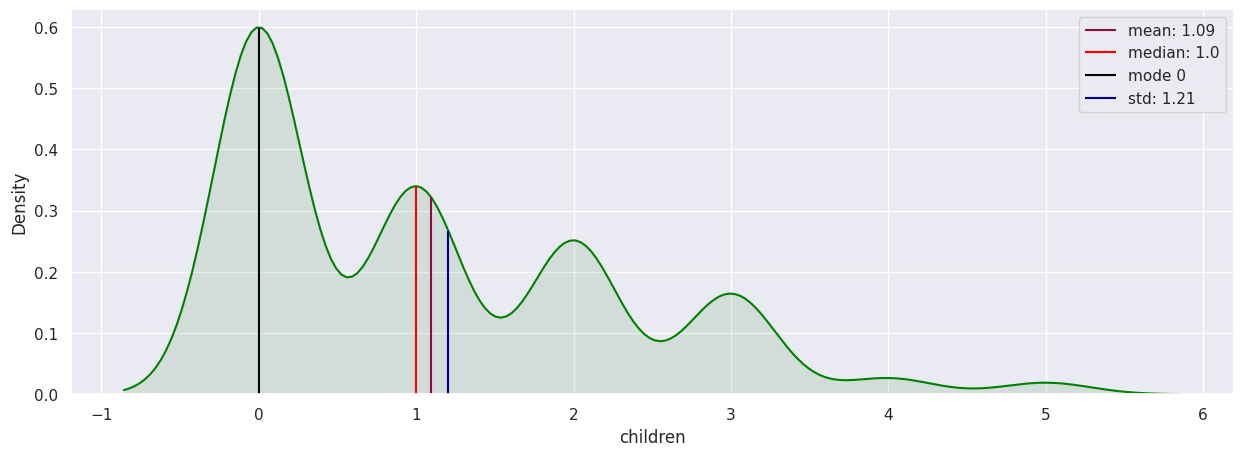

In [55]:
# children feature:

plt.figure(figsize=(15,5))
ax = sns.kdeplot(data=data, x="children", shade=False, color='green')


kdeline = ax.lines[0]
mean = data['children'].mean()
median = data['children'].median()
mode = data['children'].mode()[0]
std = data['children'].std()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

# mean:
height_mean = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height_mean, color='#900C3F', ls='-', label=f"mean: {round(mean,2)}")

# median:
height_median = np.interp(median, xs, ys)
ax.vlines(median, 0, height_median, color='red', ls='-', label=f"median: {round(median,2)}")

# mode:
height_mode = np.interp(mode, xs, ys)
ax.vlines(mode, 0, height_mode, color='black', ls='-', label=f"mode {round(mode,2)}")

# standard deviation:
height_std = np.interp(std, xs, ys)
ax.vlines(std, 0, height_std, color='darkblue', ls='-', label=f"std: {round(std,2)}")

ax.legend()
ax.fill_between(xs, 0, ys, facecolor='darkgreen', alpha=0.1)
plt.show()

In [56]:
# How many data points are belong in certain children values:

children_per_have_0 = round((data[data['children'] == 0].shape[0] / data.shape[0]) * 100, 2)
children_per_have_1 = round((data[data['children'] == 1].shape[0] / data.shape[0]) * 100, 2)
children_per_have_2 = round((data[data['children'] == 2].shape[0] / data.shape[0]) * 100, 2)
children_per_have_3 = round((data[data['children'] == 3].shape[0] / data.shape[0]) * 100, 2)
children_per_have_4 = round((data[data['children'] == 4].shape[0] / data.shape[0]) * 100, 2)
children_per_have_5 = round((data[data['children'] == 5].shape[0] / data.shape[0]) * 100, 2)

print(f"Percentage of data points where children is 0: {children_per_have_0}%")
print(f"Percentage of data points where children is 1: {children_per_have_1}%")
print(f"Percentage of data points where children is 2: {children_per_have_2}%")
print(f"Percentage of data points where children is 3: {children_per_have_3}%")
print(f"Percentage of data points where children is 4: {children_per_have_4}%")
print(f"Percentage of data points where children is 5: {children_per_have_5}%")

Percentage of data points where children is 0: 42.9%
Percentage of data points where children is 1: 24.22%
Percentage of data points where children is 2: 17.94%
Percentage of data points where children is 3: 11.73%
Percentage of data points where children is 4: 1.87%
Percentage of data points where children is 5: 1.35%


## **Finding the Relationship between Independent & Dependent features:**

#### **age vs expences:**

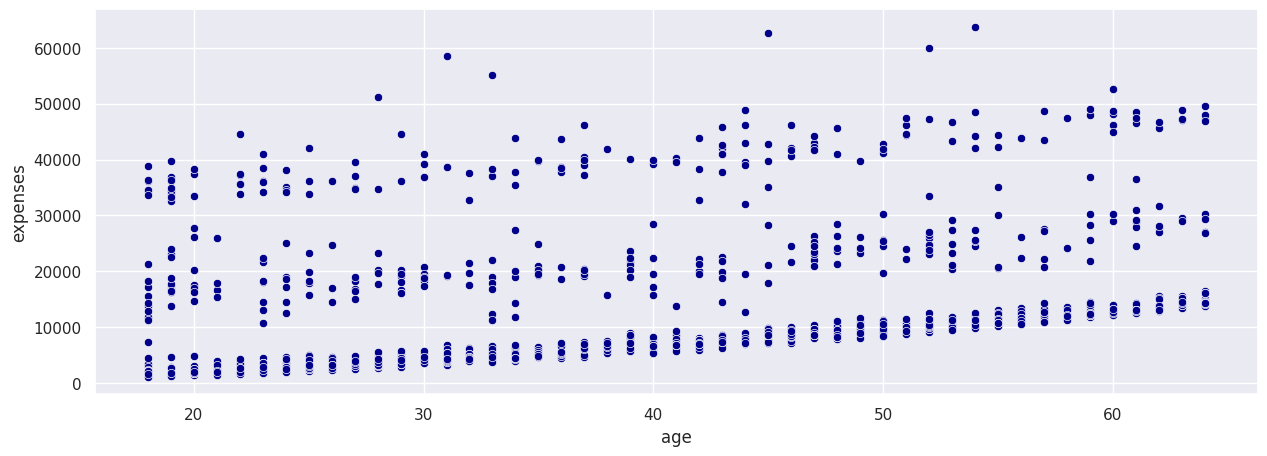

In [57]:
# Check the relationship between Independent & Dependent features: (age vs expences)

plt.figure(figsize=(15,5))
sns.scatterplot(data=data, x="age", y="expenses", color='darkblue')
plt.show()

#### **bmi vs expences:**

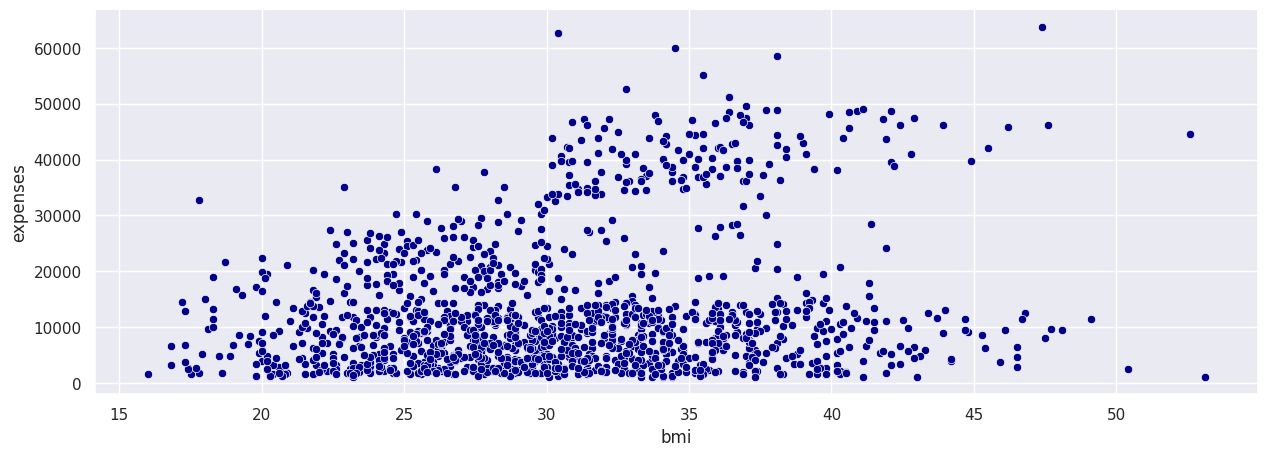

In [58]:
# Check the relationship between Independent & Dependent features: (bmi vs expences)

plt.figure(figsize=(15,5))
sns.scatterplot(data=data, x="bmi", y="expenses", color='darkblue')
plt.show()

#### **children vs expences:**

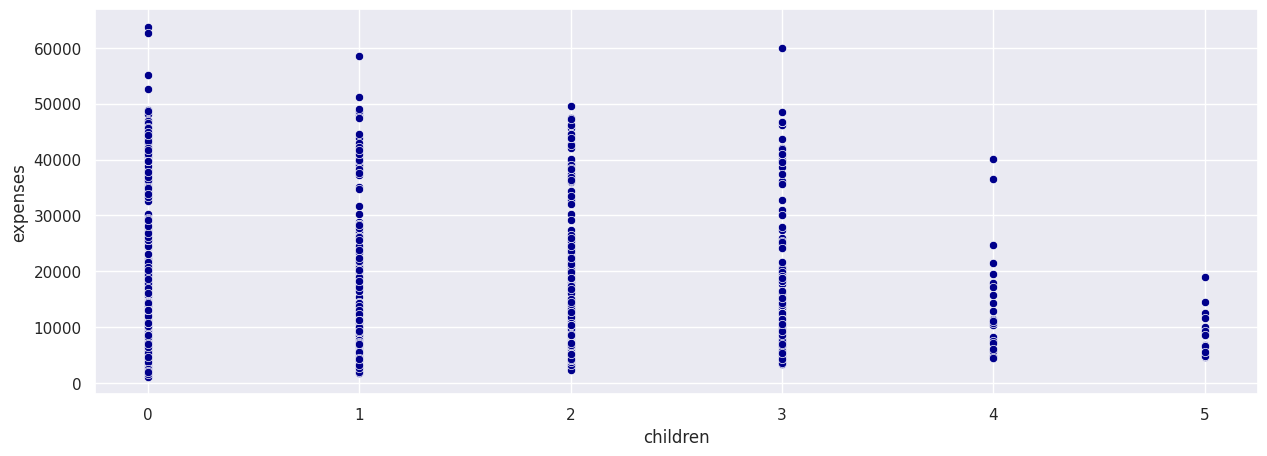

In [59]:
# Check the relationship between Independent & Dependent features: (children vs expences)

plt.figure(figsize=(15,5))
sns.scatterplot(data=data, x="children", y="expenses", color='darkblue')
plt.show()

#### **region vs. expences:**

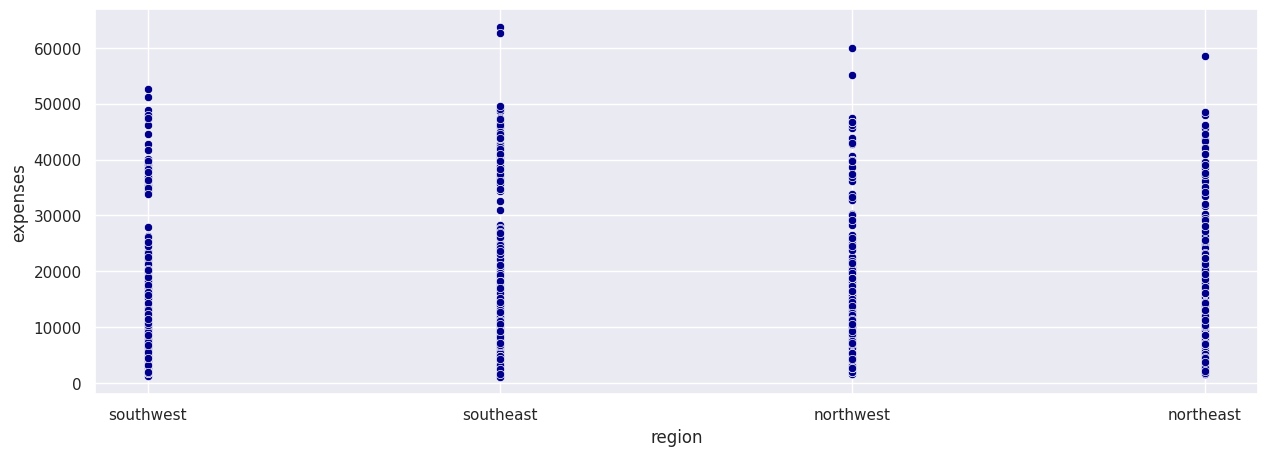

In [60]:
# Check the relationship between Independent & Dependent features: (region vs expences)

plt.figure(figsize=(15,5))
sns.scatterplot(data=data, x="region", y="expenses", color='darkblue')
plt.show()

#### **sex vs. expences:**

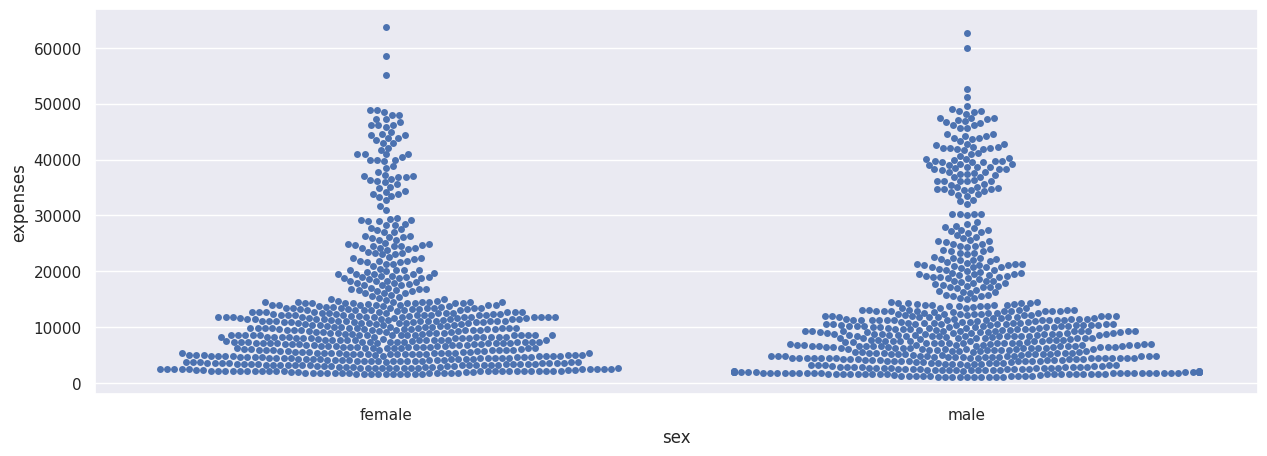

In [61]:
# Check the relationship between Independent & Dependent features: (sex vs expences)

plt.figure(figsize=(15,5))
sns.swarmplot(data=data, x="sex", y="expenses")
plt.show()

## **Multico-llinearity:**

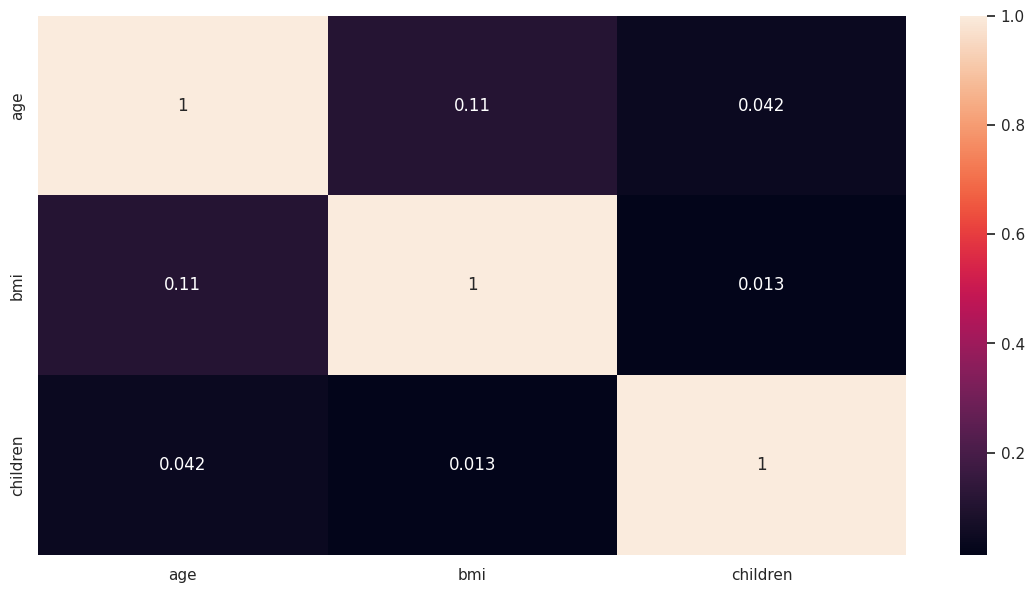

In [62]:
# Chek the Correlation:

X = data[['age', 'bmi', 'children']]
plt.figure(figsize=(14,7))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [63]:
# Chek the VIF:

vif = pd.DataFrame()
vif["predictor"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,predictor,VIF Factor
0,age,7.537196
1,bmi,7.846898
2,children,1.796587


## **Finding Outliers:**

#### **age feature:**

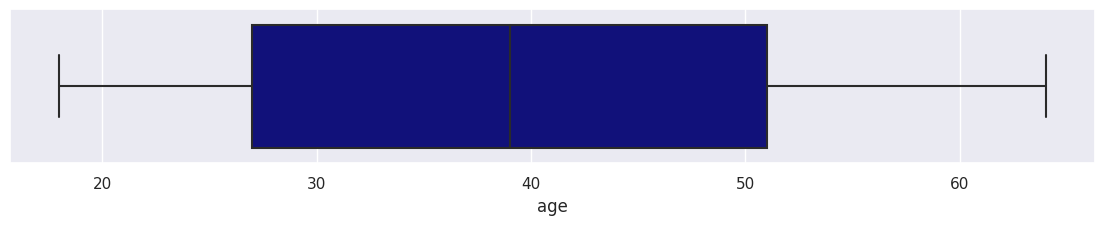

In [64]:
plt.figure(figsize=(14,2))
sns.boxplot(data=data, x="age", color='darkblue')
plt.show()

#### **bmi feature:**

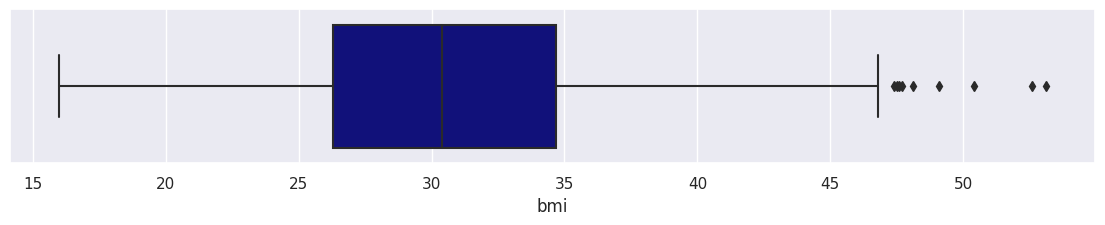

In [65]:
plt.figure(figsize=(14,2))
sns.boxplot(data=data, x="bmi", color='darkblue')
plt.show()

#### **children feature:**

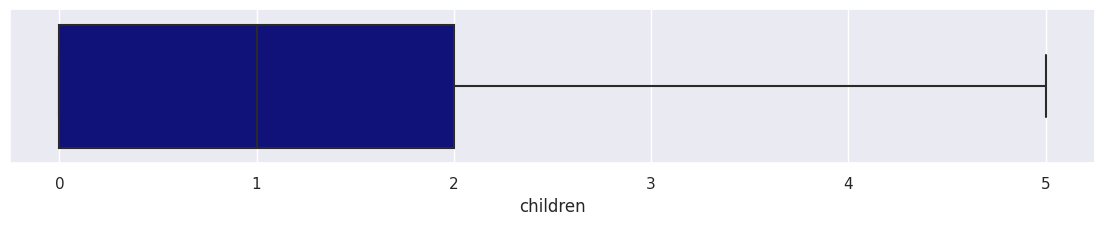

In [66]:
plt.figure(figsize=(14,2))
sns.boxplot(data=data, x="children", color='darkblue')
plt.show()

#### **expences feature:**

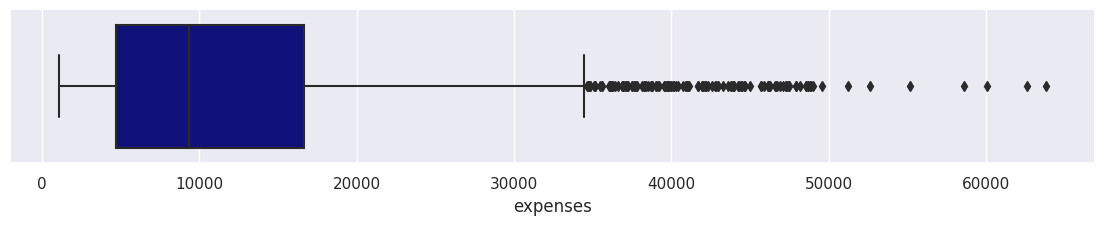

In [67]:
plt.figure(figsize=(14,2))
sns.boxplot(data=data, x="expenses", color='darkblue')
plt.show()

## Conclusions:

* **1.** **age** & **expenses** feature data is not normally distributed.<br><br>
* **2.** **bmi** feature's data is normally distributed.<br><br>
* **3.** In **age** feature: ~10.24% data is below 20 (years), ~8.5% data above 60 (years), and ~80% data is belong in between 20 to 60 (years)<br><br>
* **4.** In **bmi** feature: ~1.05% data below 18 (bmi), ~17% data in between 18 to 25 (bmi) and ~82% data belong above 25 (bmi).<br><br>
* **5.** In **expenses** feature: ~54% data belong in between 1k to 10k, ~27% data is belong in between 10k to 20k, ~20% data belong in between 20k to 50k and 0.52% data present above 50k.<br><br>
* **6.** In **children** feature: ~43% data have 0 (zero children), ~24% data have 1 (one children), ~18% data have 2 (two children), ~12% data have 3 (three children), ~2% data have 4 (four children) and 1.35% data have 5 (five children).<br><br>
* **7.** Thre is no such linear relationship between independent features (age, bmi, children) and dependent feature (expenses).<br><br>
* **8.** **age** & **bmi** features are highly correlated (based on VIF).<br><br>
* **9.** **bmi** & **expenses** features have outliers, but **expenses** feature have lots of outliers.
<br><br>
* **10.** **region** feature does not have any significants to build the ML-model.

<br><br><br>

**Note:** We are not handle the outliers, Multicollinearity factors. And not scale the data here. It will be done in ML-Pipeline.